In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# set print options for pandas
# set column width to 1000
pd.set_option('display.max_colwidth', 10000)  # Deprecated since version 1.0.0: Use None instead of -1.
pd.set_option('display.width', 10000)  # Automatically detect the display width for wrapping.
pd.set_option('display.max_columns', 10000)  # Show all columns.
pd.set_option('display.max_rows', 10000)  # Show all rows.


In [55]:
df = pd.read_csv('./stat/combine_result.csv')
# only keep selected columns
df = df[['Para3', 'app', 'ipc', 'uops_from_ic', 'uops_from_uc', 'cycles_from_ic', 'cycles_from_uc', 'cycles_starve']]
# rename columns Para3 to repl
df = df.rename(columns={'Para3': 'repl'})
keepName = ['lru', 'srrip', 'ghrp', 'thermo', 'DynamicBypass', 'foo']
df = df[df['repl'].isin(keepName)]
renameMap = {'lru':"LRU", 'srrip':"SRRIP", 'ghrp':"GHRP", 'thermo':"Thermo", 'DynamicBypass':"Furbys", 'foo':"FLACK"}
# map the repl name
df['repl'] = df['repl'].map(renameMap)
# reset index
df = df.reset_index(drop=True)
print(df.head())

    repl              app      ipc  uops_from_ic  uops_from_uc  cycles_from_ic  cycles_from_uc  cycles_starve
0  SRRIP            mysql  1.15877      31452051      83400106        10468720        21200667       45999243
1  SRRIP           tomcat  1.15551      24378075      89640099         7896759        20776739       49214037
2  SRRIP        cassandra  0.63246      25919734      84457748         9214790        22742742      110343885
3  SRRIP  finagle-chirper  1.14746      30240686      83044509        10058035        19667159       48708883
4  SRRIP           python  1.38126      23941157      86373033         8754982        23059629       33343272


In [59]:
printdf = df.copy()
# only keep repl = [LRU, Furbys]
keepName = ['LRU', 'Furbys']
printdf = printdf[printdf['repl'].isin(keepName)]
# only keep app = mysql
keepName = ['mysql']
printdf = printdf[printdf['app'].isin(keepName)]
printdf = printdf.set_index('repl')
print(printdf.head())

          app      ipc  uops_from_ic  uops_from_uc  cycles_from_ic  cycles_from_uc  cycles_starve
repl                                                                                             
LRU     mysql  1.15793      31805694      83046463        10632208        21072634       46020280
Furbys  mysql  1.16210      28683359      86168798         9608043        21698485       46139308


In [52]:
cycle_metrics = ['cycles_from_ic', 'cycles_from_uc', 'cycles_starve']
uops_metrics = ['uops_from_ic', 'uops_from_uc']
apps = df['app'].unique()

/tmp/ipykernel_2156643/3771825568.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_sum_df = app_df.groupby('repl')[cycle_metrics].sum()
/tmp/ipykernel_2156643/3771825568.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_sum_df = app_df.groupby('repl')[cycle_metrics].sum()
/tmp/ipykernel_2156643/3771825568.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_sum_df = app_df.groupby('repl')[cycle_metrics

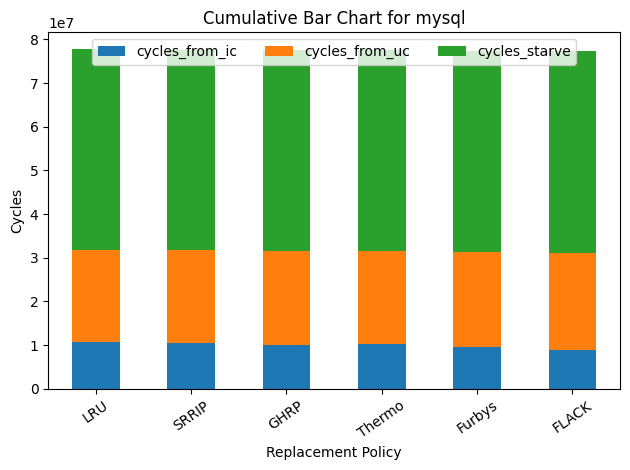

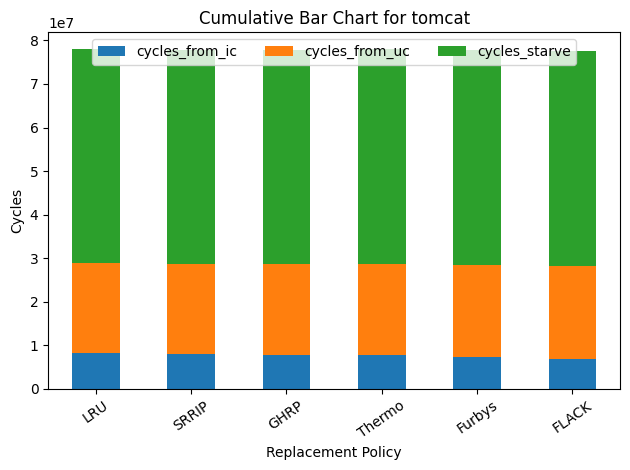

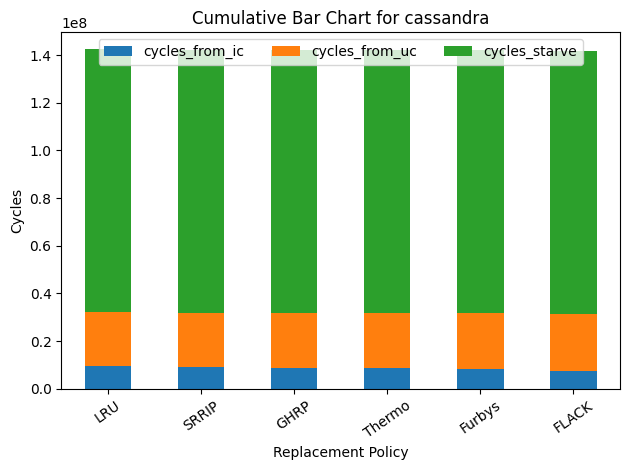

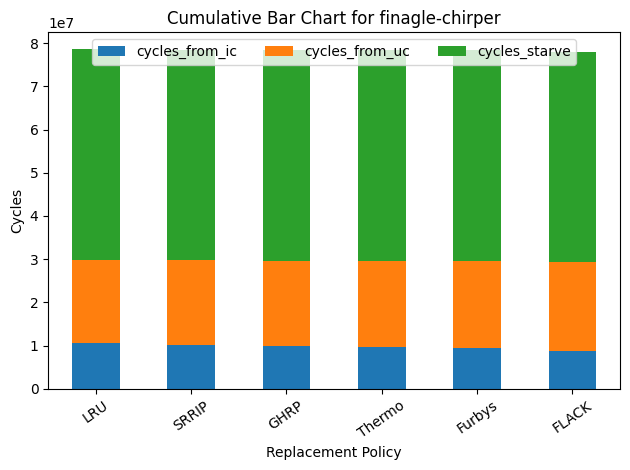

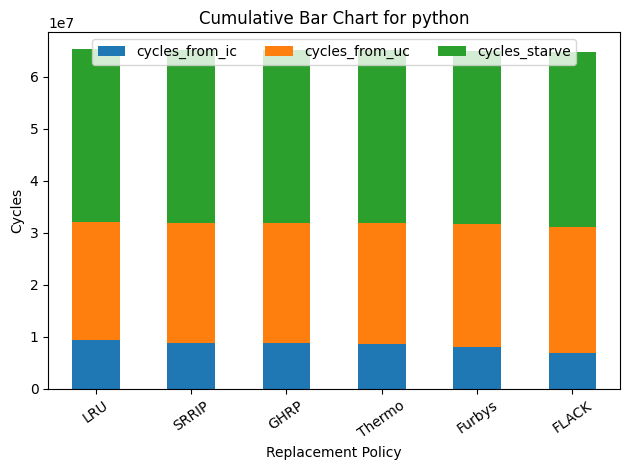

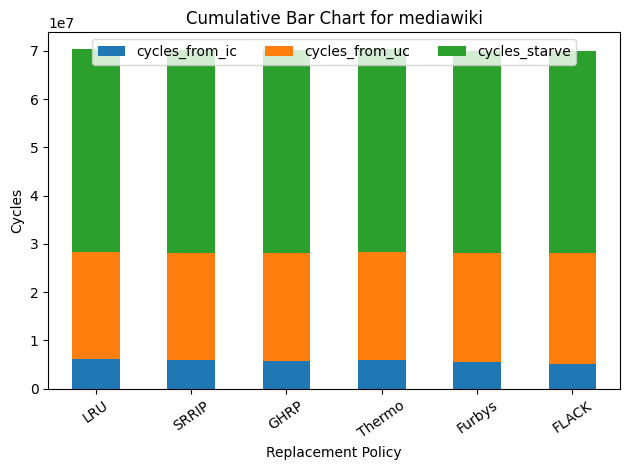

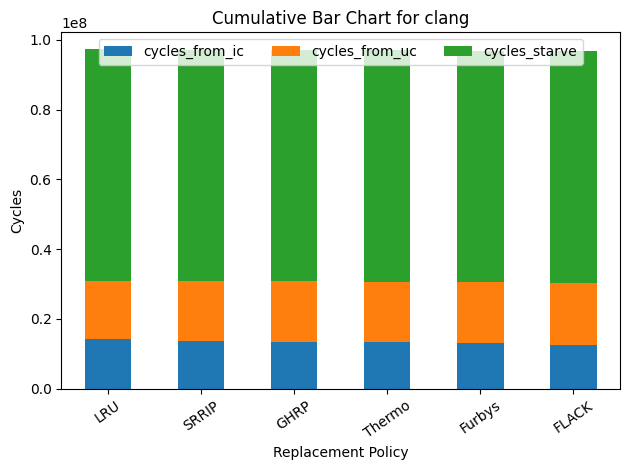

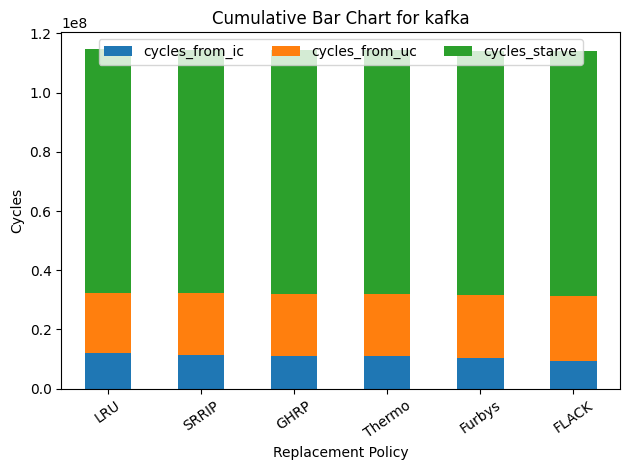

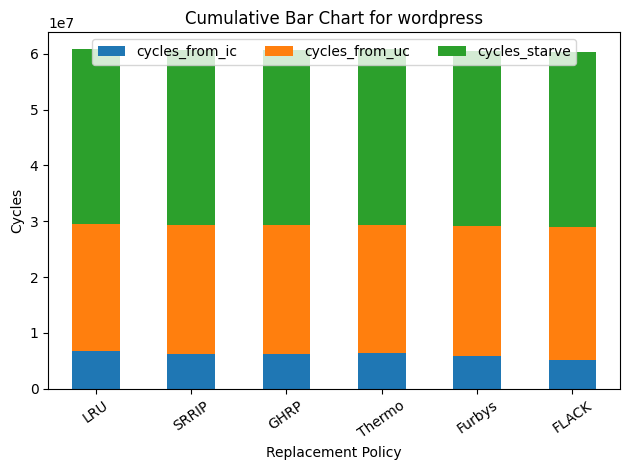

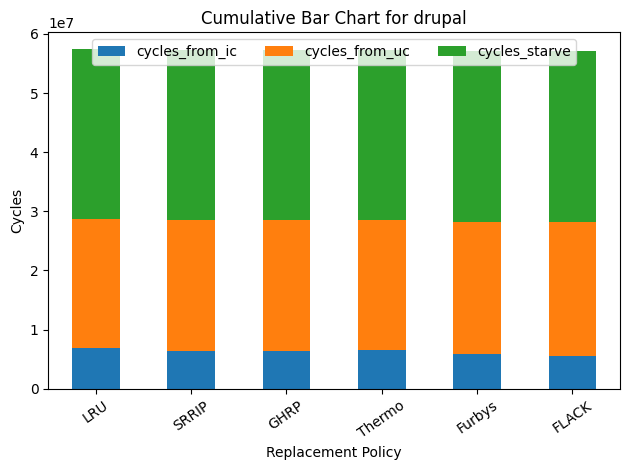

In [54]:
# surpress SettingWithCopyWarning warning and FutureWarning
pd.options.mode.chained_assignment = None  # default='warn'
# surpress FutureWarning
pd.set_option('mode.chained_assignment', None)  # default='warn'
cycles_df = df[['app', 'repl', 'cycles_from_ic', 'cycles_from_uc', 'cycles_starve']]
for app in apps:
    app_df = cycles_df[cycles_df['app'] == app]
    desired_order = ['LRU', 'SRRIP', 'GHRP', 'Thermo', 'Furbys', 'FLACK']
    app_df['repl'] = pd.Categorical(app_df['repl'], categories=desired_order, ordered=True)
    app_df = app_df.sort_values('repl')
    app_df = app_df.set_index('repl')
    app_sum_df = app_df.groupby('repl')[cycle_metrics].sum()
    
    # Create a cumulative bar chart
    app_sum_df_cum = app_sum_df.cumsum(axis=1)
    
    app_df.plot(kind='bar', stacked=True)
    # put title to bottom
    plt.title(f'Cumulative Bar Chart for {app}')
    plt.xlabel('Replacement Policy')
    plt.ylabel('Cycles')
    # manually set legend location to top center
    plt.legend(loc='upper center', ncol=3)
    # set angle of xticks to 35
    plt.xticks(rotation=35)
    plt.tight_layout()
    # plt.savefig(f'./plot/cycle/{app}_cumulative_bar_chart.png')

/tmp/ipykernel_2156643/2594133218.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_sum_df = app_df.groupby('repl')[uops_metrics].sum()
/tmp/ipykernel_2156643/2594133218.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_sum_df = app_df.groupby('repl')[uops_metrics].sum()
/tmp/ipykernel_2156643/2594133218.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_sum_df = app_df.groupby('repl')[uops_metrics].s

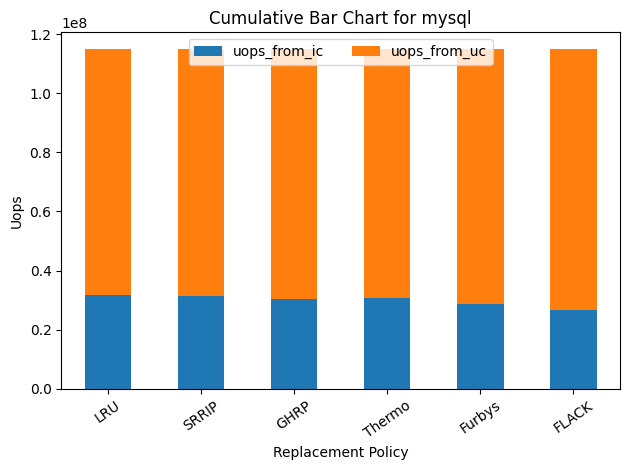

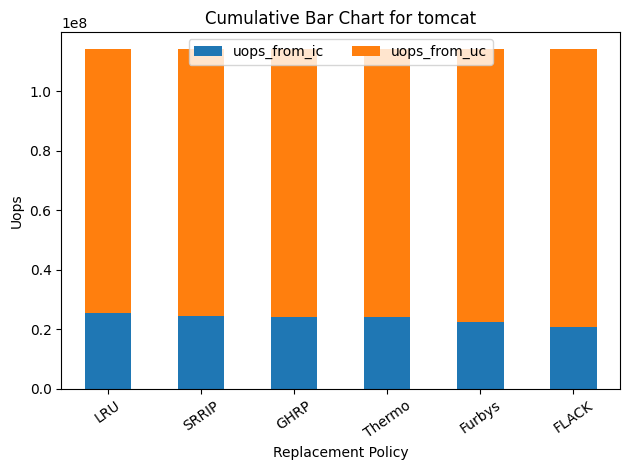

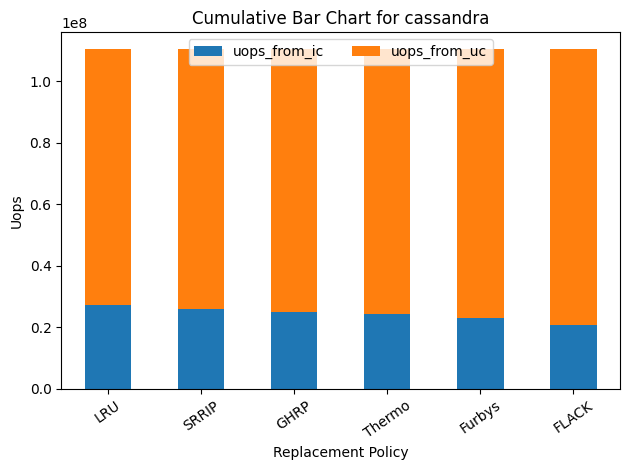

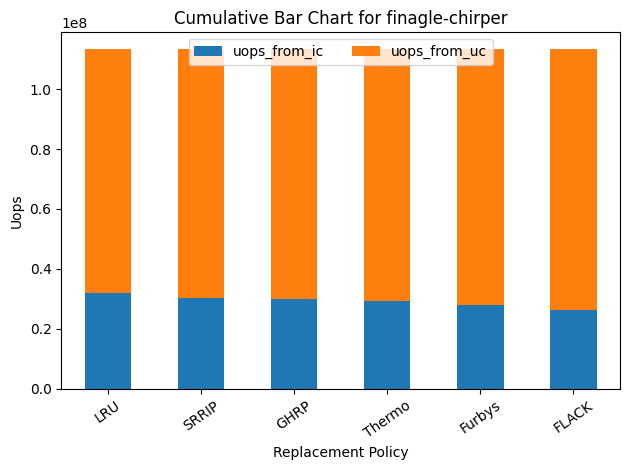

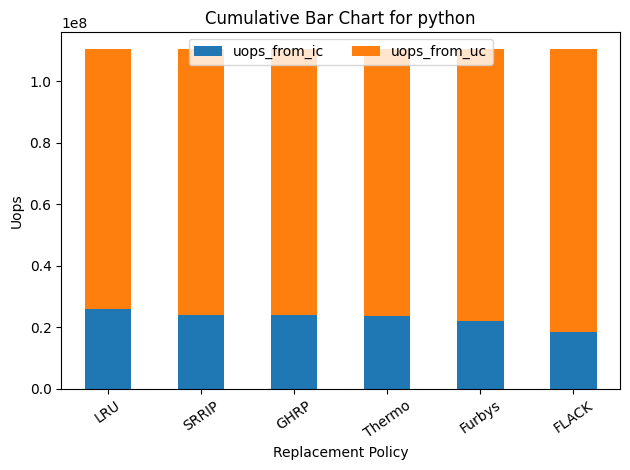

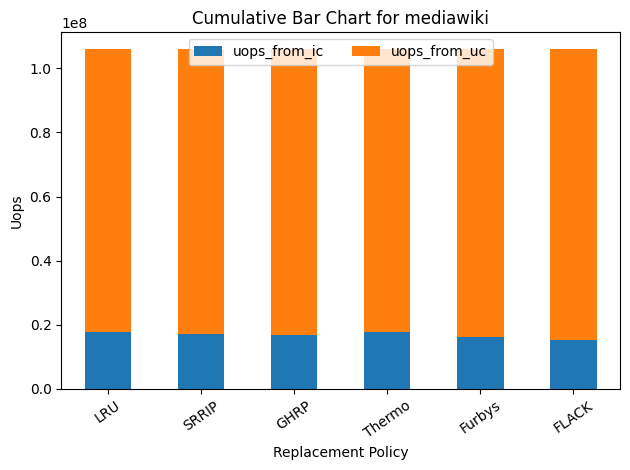

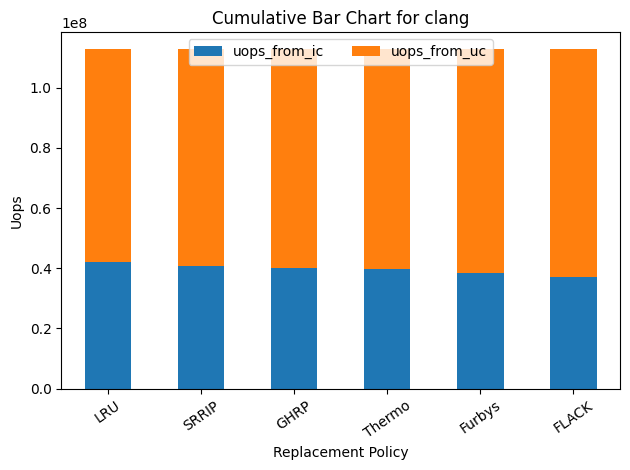

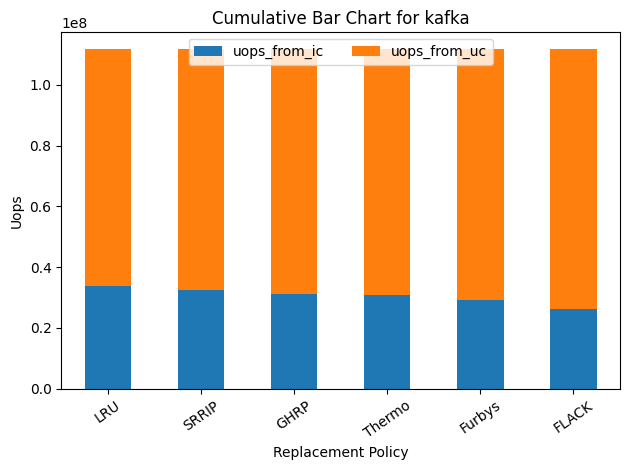

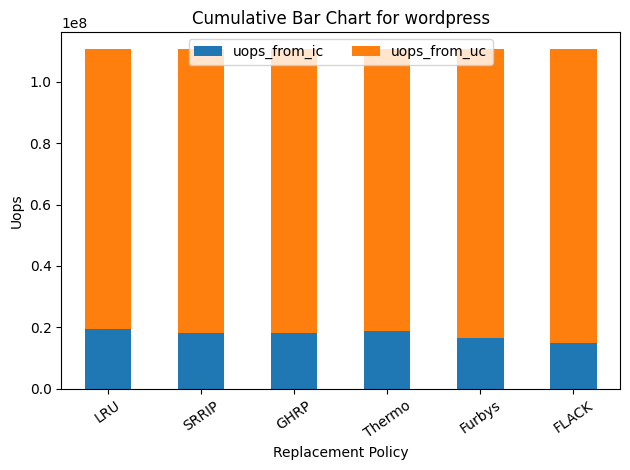

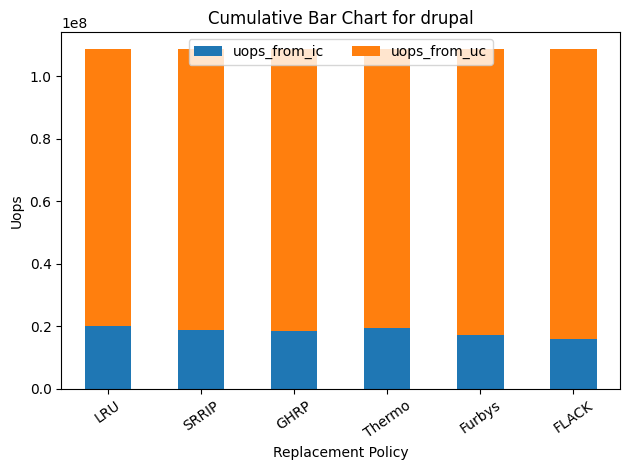

In [49]:
# surpress SettingWithCopyWarning warning and FutureWarning
pd.options.mode.chained_assignment = None  # default='warn'
# surpress FutureWarning
pd.set_option('mode.chained_assignment', None)  # default='warn'
uops_df = df[['app', 'repl', 'uops_from_ic', 'uops_from_uc']]
for app in apps:
    app_df = uops_df[uops_df['app'] == app]
    desired_order = ['LRU', 'SRRIP', 'GHRP', 'Thermo', 'Furbys', 'FLACK']
    app_df['repl'] = pd.Categorical(app_df['repl'], categories=desired_order, ordered=True)
    app_df = app_df.sort_values('repl')
    app_df = app_df.set_index('repl')
    app_sum_df = app_df.groupby('repl')[uops_metrics].sum()
    
    # Create a cumulative bar chart
    app_sum_df_cum = app_sum_df.cumsum(axis=1)
    
    app_df.plot(kind='bar', stacked=True)
    # put title to bottom
    plt.title(f'Cumulative Bar Chart for {app}')
    plt.xlabel('Replacement Policy')
    plt.ylabel('Uops')
    # manually set legend location to top center
    plt.legend(loc='upper center', ncol=3)
    # set angle of xticks to 35
    plt.xticks(rotation=35)
    plt.tight_layout()
    # plt.savefig(f'./plot/cycle/{app}_cumulative_bar_chart.png')